<a href="https://colab.research.google.com/github/kayteeflick/nma_cn_flow_state/blob/spikeBins/binnedSpikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flow State Template Analysis File

General functions to use in all notebooks. Make a copy of this to start a new type of analysis.




## Imports

In [103]:
#title 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

## Data Retrieval - spikes

In [104]:
#title Data retrieval - spikes
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

define spike as spk variable and select single mouse [11]

In [105]:
#for n in range [] #subset
spk = alldat[11]['spks'] #(neurons, trials, time)

In [106]:
spikes = []
for i in range(spk.shape[0]): # loop through all neurons (from single mouse defined above)
  spikes.append(np.argwhere(spk[i,0,:])[:,0])


array([  3,  13,  22,  29,  35,  38,  44,  50,  57,  63,  67,  71,  74,
        76,  79,  87,  96, 101, 104, 106, 107, 108, 109, 110, 120, 121,
       128, 130, 133, 135, 140, 151, 158, 174, 177, 185, 187, 189, 193,
       195, 198, 201, 208, 210, 213, 218, 221, 224, 229, 245, 247])

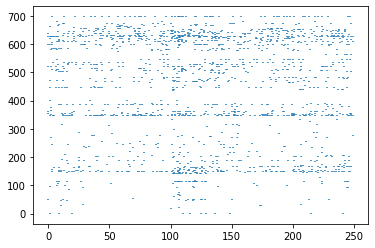

In [107]:
spikes = []
for i in range(spk.shape[0]): # loop through all neurons (from single mouse defined above)
  spikes.append(np.argwhere(spk[i,0,:])[:,0])
_ = plt.eventplot(spikes)

# index of spike indicated with a 1
np.argwhere(spk[i,0,:]==1)[:,0]

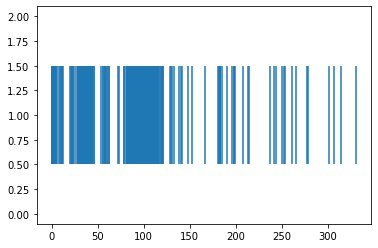

In [108]:
#plt.eventplot?
_ = plt.eventplot(np.argwhere(spk[0,:,:])[:,0])

individual spike visualization for subject by condition

0.0
1.0
-1.0


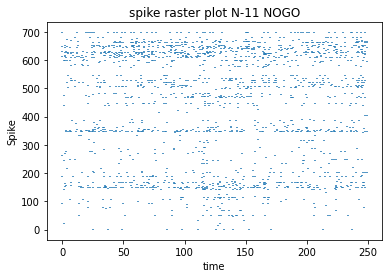

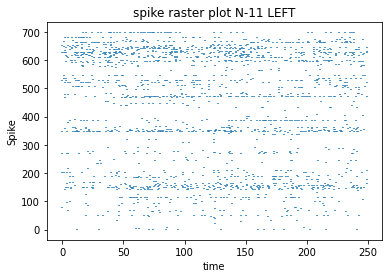

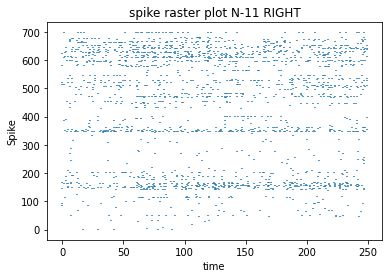

In [109]:
# (-1, 0, 1) :: -1 right side correct choise, 0 no go response, 1 left side correct choice
rsp = alldat[11]['response']

print(rsp[2])
print(rsp[3])
print(rsp[4])

# rastor plot $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $ $

## no-go response
nogospk = []
for i in range(spk.shape[0]):
  nogospk.append(np.argwhere(spk[i,2,:]==1)[:,0])
_ = plt.eventplot(nogospk)
# fig & axes title
plt.title('spike raster plot N-11 NOGO')
plt.xlabel('time')
plt.ylabel('Spike')
# Display spike raster plot  for N11 nogo resp
plt.show()

## left response
leftspk = []
for i in range(spk.shape[0]):
  leftspk.append(np.argwhere(spk[i,3,:]==1)[:,0])
_ = plt.eventplot(leftspk)
# fig & axes title
plt.title('spike raster plot N-11 LEFT')
plt.xlabel('time')
plt.ylabel('Spike')
# Display spike raster plot for N11 left resp
plt.show()

## Right response
rightspk = []
for i in range(spk.shape[0]):
  rightspk.append(np.argwhere(spk[i,4,:]==1)[:,0])
_ = plt.eventplot(rightspk)
# fig & axes title
plt.title('spike raster plot N-11 RIGHT')
plt.xlabel('time')
plt.ylabel('Spike')
# Display spike raster plot for N11 right resp
plt.show()


In [110]:
# /\ /\ trash notes
# for i in range(data.shape[0]):
#   trl_data.append(np.argwhere(data[i,2,:]>0)[:,0])

# for i in range(len(data)):
#       if (data[i]['contrast_right']) > 0:
#         trl_data = np.hstack((trl_data, data[i]))
#         # elif (item in data[i]['contrast_left']):
#         #   rmv_data = np.hstack((rmv_data, data[i]))

# return trl_data

#for i in range(alldat[11]):
# ind = [i for i in range(len(alldat[11]['contrast_right'])) if alldat[1]['contrast_right'][i]


# no go trials
# right trials 

# /\ /\ /\
# L = alldat[11]['contrast_left']
# print(L)

# data = alldat[11]
#data[11]['contrast_right']) >0
#trl_data = np.hstack((trl_data, data[11]))

#data[session#]['spks'][filter]
#data[session#]['spks'][vis_right > 0]

In [112]:
#define & preallocate ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~  
#dat['contrast_right']: contrast level for the right stimulus, 
  # which is always contralateral to the recorded brain areas.
#dat['contrast_left']: contrast level for left stimulus.
#dat['response']: which side the response was (-1, 0, 1). 
  # When the right-side stimulus had higher contrast, the correct choice was -1. 
  # 0 is a no go response.

def define_trials(alldat):

  for n in range (alldat.shape [0]):

    data = alldat[n]

## remove left trials 
  response = data['response'] # right - nogo - left (-1, 0, 1)
  vis_right = data['contrast_right'] # 0 - low - high
  vis_left = data['contrast_left'] # 0 - low - high

  rspLeft = data['spks'][:,response>=0] # left responses
  rspRight = data['spks'][:,response<=0] # right responses
  cueRight = data['spks'][:,vis_right>0] # stimulus on the right
  #cue_nogo = data['spks'][:,vis_right==0 && vis_left == 0 ] # no stimulus on the right
  cue_nogo = (data['spks'][:,response>=0]) & (data['spks'][:,vis_right>0])

  return rspRight, cueRight, cue_nogo

# print(rspRight.shape)
# print(cueRight.shape)
# print(cue_nogo.shape)
# print(cueRight[0,0,0])

## if correct or incorrect 
def trial_result (data, rspLeft, rspRight, cueRight, cue_nogo):

  for n in range (alldat.shape [0]):

    data = alldat[n]
    correct_trial = []
    error_trial = []

    for i in range(data.shape [1]): # loop through all neurons

      if (rspRight[:,n,:] == 1)  & (cueRight[:,n,:] == 1):
        correct_trial = data['spks']

      elif (rspRight[:,n,:] != cueRight[:,n,:] == 1):
        error_trial = data['spks']

    return correct_trial, error_trial

print(error_trial.shape)

NameError: ignored

In [ ]:
# neurons #trials #time
# stack trials tip to tail based on response condition
#spikes = np.hstack(scut)


In [ ]:
stim = rsp
spike = spk[:,5,:] # all neurons, 1 trial, all time
print(spike.shape)
dt_stim = 1

plot_stim_and_spikes(stim, spike, dt_stim)

## Data retrieval - LFP

In [ ]:
 
import os, requests

fname = ['steinmetz_st.npz']
fname.append('steinmetz_wav.npz')
fname.append('steinmetz_lfp.npz')

url = ["https://osf.io/4bjns/download"]
url.append("https://osf.io/ugm9v/download")
url.append("https://osf.io/kx3v9/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

dat_LFP = np.load('steinmetz_lfp.npz', allow_pickle=True)['dat']


`dat_LFP`, `dat_WAV`, `dat_ST` contain 39 sessions from 10 mice, data from Steinmetz et al, 2019, supplemental to the main data provided for NMA. Time bins for all measurements are 10ms, starting 500ms before stimulus onset (same as the main data). The followin fields are available across the three supplemental files. 

* `dat['lfp']`: recording of the local field potential in each brain area from this experiment, binned at `10ms`.
* `dat['brain_area_lfp']`: brain area names for the LFP channels. 
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['waveform_w']`: temporal components of spike waveforms. `w@u` reconstructs the time by channels action potential shape. 
* `dat['waveform_u]`: spatial components of spike waveforms.
* `dat['ss']`: neurons by trials. Exact spikes times for each neuron and each trial, reference to the stimulus onset. A (neuron,trial) entry can be an empty list if that neuron did not fire at all on that trial. 
* `dat['%X%_passive']`: same as above for `X` = {`lfp`, `ss`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 




## Functions

In [ ]:
# commmon functions

def select_brois(data, brois, data_type, selection=True):
  '''
  Args:
    data: a numpy array of the Steinmetz 2019 data
    brois: a list of brain regions of interest
    data_type: "LFP" or "spikes"
    selection: if True, filters for sessions that contain all brois. If False, filters
        for sessions that contain any of the brois
  Returns:
    an embedded 1-d numpy array, with length = number of filtered session
  '''
  selected_data = np.array([])

  if data_type == "LFP":
    brain_area = "brain_area_lfp"
  elif data_type == "spikes":
    brain_area = "brain_area"

  if selection == True:
    for i in range(len(data)):
      if all(item in data[i][brain_area] for item in brois):
        selected_data = np.hstack((selected_data, data[i]))
  else:
    for i in range(len(data)):
      if any(item in data[i][brain_area] for item in brois):
        selected_data = np.hstack((selected_data, data[i]))

  return selected_data

def sel_neurons():
  print('todo')
  return

def spks_to_rate(spks):
  print('todo')
  return

def butter_bandpass_backend(lowcut, highcut, fs, order=6):
  nyq = 0.5 * fs
  low = lowcut / nyq
  high = highcut / nyq
  b, a = butter(order, [low, high], btype='band')
  return b, a

def butter_bandpass_filter_good_func(data, lowcut, highcut, fs, order=6):
  b, a = butter_bandpass_backend(lowcut, highcut, fs, order=order)
  y = lfilter(b, a, data)
  return y 

def get_behavioral_idx(alldat,recording_session):
  temp_dat = alldat[recording_session]
  response = temp_dat['response'] # right - nogo - left (-1, 0, 1)
  vis_right = temp_dat['contrast_right'] # 0 - low - high
  vis_left = temp_dat['contrast_left'] # 0 - low - high
  gocue_idx = temp_dat['gocue']
  rt_idx = temp_dat['reaction_time']
  return response, vis_right, vis_left, gocue_idx, rt_idx


## Testing Filter Function

In [ ]:
# brain regions of interest
# brois = ["ACA", "CA1", "DG", "MRN", "PL","VISp", "ZI"]
brois = ["PL","VISp"]

filtered_spikes = select_brois(alldat, brois, "spikes")
print(len(filtered_spikes))

#filtered_lfp = select_brois(dat_LFP, brois, "LFP")
#print(len(filtered_lfp))

##Testing Bandpass Function 

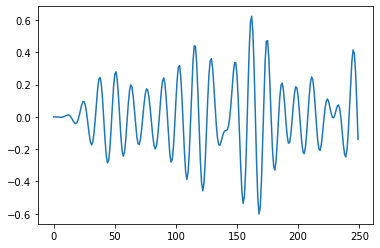

In [ ]:
#pulling LFP Data of mouse 11 
dat = dat_LFP[11]
# Sample rate and desired cutoff frequencies (in Hz).
fs = 100.0
lowcut = 6.0
highcut = 9.0
filt_data = butter_bandpass_filter_good_func(dat['lfp'], lowcut, highcut, fs,order=5)
#plotting 
test = np.mean(filt_data,axis=0)
plt.plot(np.mean(test,axis=0))

## Filter Spikes Dataset

In [ ]:
# brain regions of interest
brois = ["ACA", "CA1", "DG", "MRN", "PL","VISp", "ZI"]
data = 
data_type = 'spikes'
select_brois(data, brois, data_type, selection=True):